## Performance 

<Axes: xlabel='num_tasks', ylabel='totalRouteCosts'>

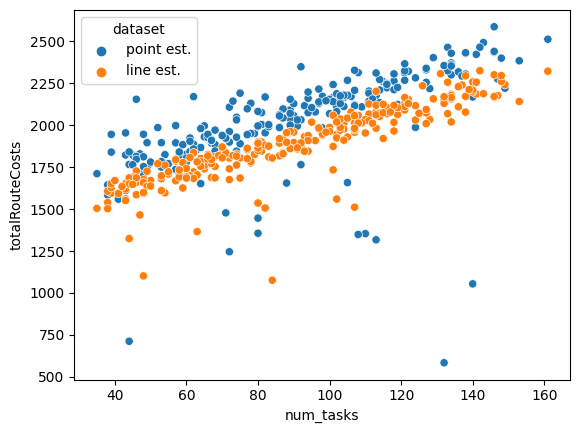

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# ours_naive_df = pd.read_csv("benchmarks/ours_naive_2robots_1200capacity_AC300.csv")
# ours_df = pd.read_csv("benchmarks/ours_2robots_1200capacity_AC300.csv")
ours_naive_df = pd.read_csv("benchmarks/ours_naive_4robots_600capacity_AC300.csv")
ours_df = pd.read_csv( "benchmarks/ours_4robots_600capacity_AC300.csv")
# ours_naive_df = pd.read_csv("benchmarks/ours_naive_1robots_infcapacity_AC300.csv")
# ours_df = pd.read_csv("benchmarks/ours_1robots_infcapacity_AC300.csv")

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])

sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset")



[Text(0.5, 0, 'Total travel time (s)'), Text(0, 0.5, 'Number of tasks')]

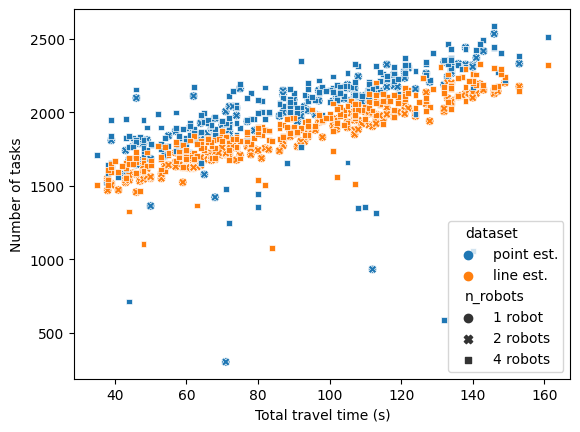

In [165]:
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv("benchmarks/ours_naive_2robots_1200capacity_AC300.csv")
ours_df = pd.read_csv("benchmarks/ours_2robots_1200capacity_AC300.csv")
ours_naive_4r_df = pd.read_csv("benchmarks/ours_naive_4robots_600capacity_AC300.csv")
ours_4r_df = pd.read_csv( "benchmarks/ours_4robots_600capacity_AC300.csv")
ours_naive_1r_df = pd.read_csv("benchmarks/ours_naive_1robots_infcapacity_AC300.csv")
ours_1r_df = pd.read_csv("benchmarks/ours_1robots_infcapacity_AC300.csv")

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="1 robot"),
        ours_df.assign(dataset="line est.").assign(n_robots="1 robot"),
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

fig =sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset", style="n_robots")
fig.set(xlabel='Total travel time (s)', ylabel='Number of tasks')

# # Create 10 bins based on x
# concatenated['bin'] = pd.cut(concatenated['num_tasks'], bins=10)

# # Calculate the mean and standard deviation of y for each bin
# bin_stats = concatenated.groupby('bin')['totalRouteCosts'].agg(['mean', 'std']).reset_index()

# # Plot the results with error bars using seaborn's barplot function
# sns.barplot(x='bin', y='mean', data=bin_stats, capsize=.2, errwidth=1.5, ci='sd')


<Axes: xlabel='num_tasks', ylabel='totalRouteCosts'>

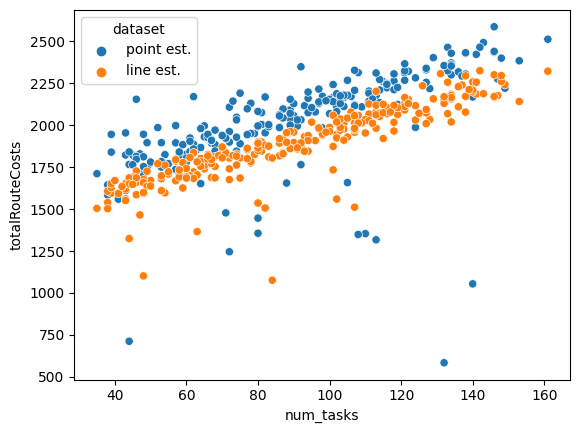

In [166]:
ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours = "benchmarks/ours_4robots_600capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])

sns.scatterplot(data=concatenated, x="num_tasks", y="totalRouteCosts", hue="dataset")

## Convergence

<Axes: xlabel='num_tasks', ylabel='iterations'>

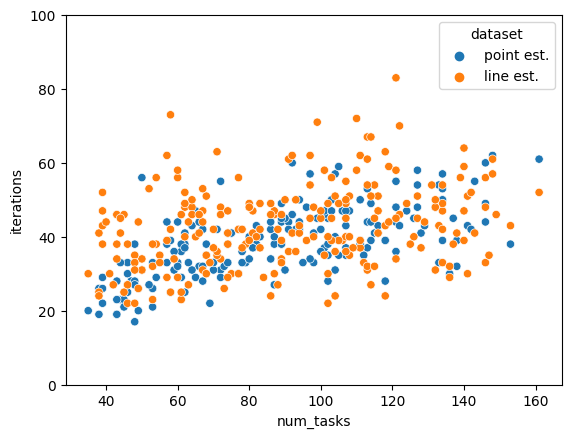

In [167]:
ours_naive = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours = "benchmarks/ours_4robots_600capacity_AC300.csv"
# ours_naive = "benchmarks/ours_naive_2robots_1200capacity_AC300.csv"
# ours = "benchmarks/ours_2robots_1200capacity_AC300.csv"

# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)

concatenated = pd.concat([ours_naive_df.assign(dataset='point est.'), ours_df.assign(dataset='line est.')])

plt.ylim(0, 100)
sns.scatterplot(data=concatenated, x="num_tasks", y="iterations", hue="dataset")

## Computation time

<Axes: xlabel='num_tasks', ylabel='computeTime'>

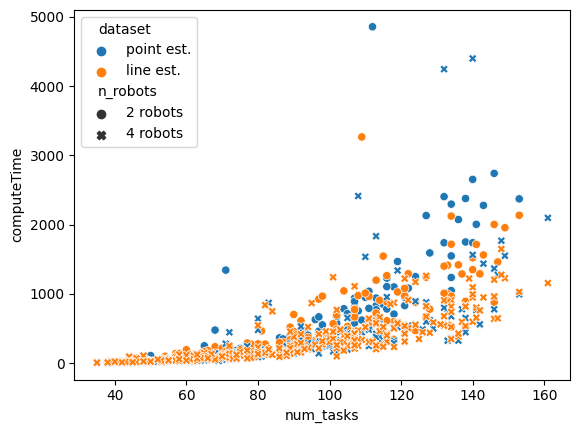

In [168]:
ours_naive = "benchmarks/ours_naive_2robots_1200capacity_AC300.csv"
ours = "benchmarks/ours_2robots_1200capacity_AC300.csv"
ours_naive_4r = "benchmarks/ours_naive_4robots_600capacity_AC300.csv"
ours_4r = "benchmarks/ours_4robots_600capacity_AC300.csv"
# Create an empty list to hold the dataframes
ours_naive_df = pd.read_csv(ours_naive)
ours_df = pd.read_csv(ours)
ours_naive_4r_df = pd.read_csv(ours_naive_4r)
ours_4r_df = pd.read_csv(ours_4r)

concatenated = pd.concat(
    [
        ours_naive_df.assign(dataset="point est.").assign(n_robots="2 robots"),
        ours_df.assign(dataset="line est.").assign(n_robots="2 robots"),
        ours_naive_4r_df.assign(dataset="point est.").assign(n_robots="4 robots"),
        ours_4r_df.assign(dataset="line est.").assign(n_robots="4 robots"),
    ]
)

sns.scatterplot(data=concatenated, x="num_tasks", y="computeTime", hue="dataset", style="n_robots")

## Cost Comparisons

In [169]:
# TODO compare the sum of the costs of all the routes with the routes generated by agarwal
# BUT be 100% clear about the difference in colision checking